In [1]:
!pip install cx_Oracle

     -------------------------------------- 213.1/213.1 kB 6.5 MB/s eta 0:00:00


In [2]:
import cx_Oracle
import pandas as pd

db=cx_Oracle.connect("c##lm","lm",'localhost:1521/xe') # 오라클 데이터 베이스에 연결
cursor=db.cursor() # 데이터베이스 커서를 생성
cursor.execute("select*from DEMO") # 데모에서 테이블 데이터를 가져온다 
x=cursor.fetchall() #데모애서 모든 열을 가져와 x에 저잘
df = pd.DataFrame(x) # x를 데이터프레임으로 변환
cursor.execute("select column_name from user_tab_columns where table_name='DEMO'")
# DEMO 테이블의 열 이름을 가져온다
col = cursor.fetchall() # 열 이름을 col에 저장

# 열 이름을 리스트에 저장
list1=[] 
for i in col: #여기에서는 결과가 튜플의 리스트로 반환되므로 
    for j in i: #for문을 중첩하여 각 튜플의 열 이름을 추출하여 리스트에 저장. 
        list1.append(j)
df.columns = list1 #df의 열 이름을 list1에 저장된 열 이름으로 설정
df.head()

,고객번호,성별,연령대,거주지역
0,00751,M,60세이상,100
1,00752,M,60세이상,440
2,00753,F,60세이상,060
3,00754,F,60세이상,055
4,00755,F,60세이상,100


In [3]:
col

[('고객번호',), ('성별',), ('연령대',), ('거주지역',)]

과제 2_0512. 과제에서 작성한 테이블을 주피터로 불러오세요

In [4]:
df_lm = pd.read_csv('df_lm.csv',index_col=0)
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0


In [5]:
#Q. H1 대비 H4간의 구매감소 고객의 비중을 구하세요.

len(df_lm[df_lm.H4 < df_lm.H1])/len(df_lm)

0.4273332301501316

In [6]:
# H1 대비 H4 고객별 성장율 컬럼을 추가하세요

df_lm['성장률']=(df_lm.H4-df_lm.H1)/df_lm.H1
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845


#### CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- <span style="background-color:#7fc97f">주어진 기간 동안의 성장률을 하나의 수치로 요약</span>하여 비교 및 분석에 용이
- 장점은 잔순 평균 수익률보다 전확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음.
- <span style="background-color:#7fc97f"> CAGR = (최종 가치/초기 가치)^(1/기간)-1</span>


<span style="background-color:#7fc97f">CAGR(Compound Annual Growth Rate)는 복합 연평균 성장률을 나타내는 지표</span>입니다. CAGR은 특정 기간 동안의 투자 또는 성장에 대한 연간 평균 성장률을 계산하는 데 사용됩니다. 이 지표는 투자 수익률이나 회사의 매출 증가율 등을 평가하는 데 유용합니다.

CAGR은 다음과 같은 방식으로 계산됩니다. 예를 들어,<font color=#6baed6> 투자의 시작 값이 P0</font>이고, <font color=#6baed6>투자의 종료 값이 Pn</font>이며,<font color=#6baed6> 기간이 n년인 경우</font>를 가정합니다.

투자의 총 변화율을 계산합니다. <span style="background-color:#c6dbef">변화율은 (Pn - P0) / P0</span>로 구할 수 있습니다.

<span style="background-color:#c6dbef">총 변화율에 1을 더한 값을 n으로 거듭제곱</span>합니다. 
<span style="background-color:#c6dbef">이는 연간 성장률을 구하기 위해 기간에 따라 변화율을 보정하는 과정</span>입니다.

<span style="background-color:#c6dbef">위에서 구한 값을 1에서 빼줍니다</span>. 이는 총 변화율에서 1년 동안의 성장률을 제거하여 정확한 연간 성장률을 얻기 위한 과정입니다.

<span style="background-color:#c6dbef">최종적으로 3에서 구한 값을 100으로 곱하여 백분율로 표현</span>
합니다.

CAGR은 연간 성장률의 복리 효과를 반영하기 때문에, 주어진 기간 동안의 성장률을 일관되게 비교할 수 있습니다. 이를 통해 투자 또는 성장의 성과를 측정하고, 서로 다른 기간이나 자산의 성과를 비교하는 데 유용하게 활용됩니다.

예를 들어,<span style="background-color:#c6dbef"> CAGR이 10%라면 해당 기간 동안 투자 또는 성장은 연평균적으로 10%씩 성장한 것으로 해석할 수 있습니다.</span>

In [7]:
#cagr 칼럼을 추가하세요
df_lm['CAGR']= (df_lm.H4/df_lm.H1)**(1/4)-1
              # H4열을 H1열로 나눈 비율.  
            #**(1/4)는 이전 계산경과에 1/4제곱을 적용.=연간 성장률(CAGR) 계산에서 4년 동안의 성장률을 의미
             # -1은 이전 결과에서 1을 뺀 값. CAGR 계산에서 일반적으로 1을 빼서 1년 동안의 성장률을 얻는다.

df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률,CAGR
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420,-0.099493
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516,0.015275
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178,-0.054903
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790,-0.072134
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845,-0.168008


In [9]:
# Q. H1 대비 H4간의 cagr 기준으로 구매감소 고객의 비중을 구하세요.
len(df_lm[df_lm.CAGR<0])/len(df_lm)

0.4273332301501316

In [10]:
df_lm['증감'] = df_lm.H4 - df_lm.H1 # H4 와 H1 간의 차이
df_lm.증감.describe()

count    1.938300e+04
mean     1.026025e+06
std      2.116641e+07
min     -1.387164e+09
25%     -9.668465e+05
50%      2.954460e+05
75%      1.875210e+06
max      1.007656e+09
Name: 증감, dtype: float64

In [12]:
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률,CAGR,증감
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420,-0.099493,-6822837
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516,0.015275,1520590
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178,-0.054903,-172097
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790,-0.072134,-1304849
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845,-0.168008,-2843890


### 과제3_0512. employees 테이블을 불러와서 다음사항을 수행하세요.

- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

In [28]:
import cx_Oracle
import pandas as pd
db = cx_Oracle.connect("c##hmkd1","hmkd1","localhost:1521/xe")
cursor = db.cursor()
cursor.execute('select * from employees')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("""select column_name from user_tab_columns where table_name='EMPLOYEES'""")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)
        
df.columns = col_list
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [30]:
sales_avg = df.groupby('DEPARTMENT_ID').mean().reset_index()
s1 = sales_avg[['DEPARTMENT_ID','SALARY']]
s1.head()

C:\Users\h\AppData\Local\Temp\ipykernel_9016\879104888.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_avg = df.groupby('DEPARTMENT_ID').mean().reset_index()


,DEPARTMENT_ID,SALARY
0,10.0,4400.000000
1,20.0,9500.000000
2,30.0,4150.000000
3,40.0,6500.000000
4,50.0,3475.555556


<Axes: xlabel='SALARY', ylabel='DEPARTMENT_ID'>

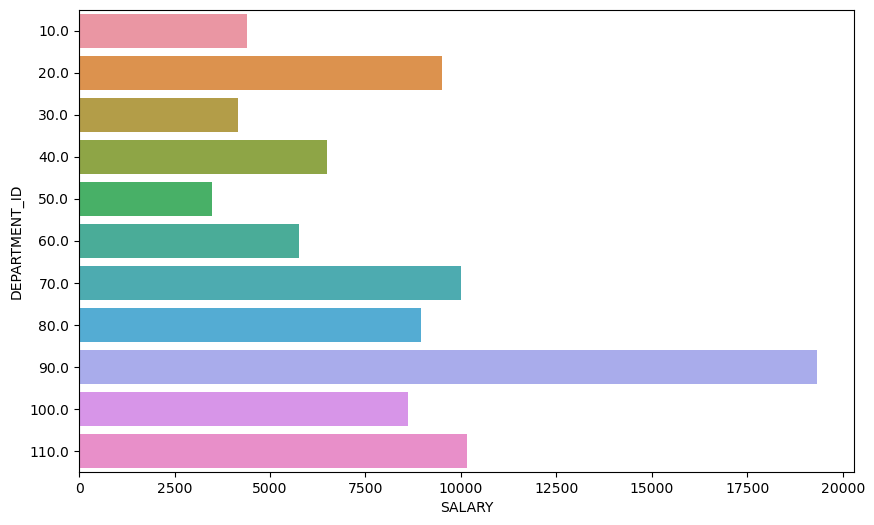

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='SALARY',y ='DEPARTMENT_ID',data=s1,orient='h')